In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd

In [2]:
delob_df = pd.read_csv("DeLOB_benchmarking.csv", index_col=0)
seqwalk_df = pd.read_csv("seqwalk_25mer_benchmark.csv", index_col=0)
rcParams['figure.dpi'] = 300


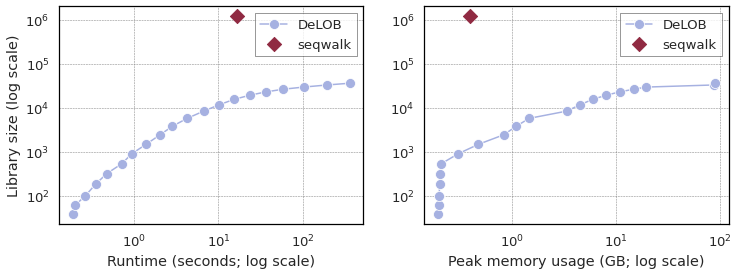

In [8]:
rcParams['figure.figsize'] = (12, 4)
rcParams['axes.edgecolor'] = 'black'
fig, axs = plt.subplots(1, 2)


sns.set(style='whitegrid', font_scale=1.2)

sns.lineplot(data=delob_df,
             x="Total time",
             y="Library size", c='#a6b1e1',
             marker='o', markersize=10, label='DeLOB', ax=axs[0])
# plt.scatter(x=res_df["Total time"], y=res_df["Library size"], 
#             color='#517a92', label='DeLOB')
axs[0].scatter(seqwalk_df['Time (s)'], seqwalk_df['Library size'], 
            color="#902a42", marker="D", 
            s=100, label='seqwalk')
axs[0].grid(color='grey', linestyle='dashed', linewidth=0.5)

axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylabel('Library size (log scale)')
axs[0].set_xlabel('Runtime (seconds; log scale)')
legend = axs[0].legend(fancybox=False, edgecolor='black')
legend.get_frame().set_linewidth(.5)

# sns.move_legend(axs[0], "upper left", bbox_to_anchor=(2.25, 1.03), title='Design tool')

sns.lineplot(data=delob_df,
             x="Peak memory usage (GB)",
             y="Library size", c='#a6b1e1', label='DeLOB',
             marker='o', markersize=10, legend=False, ax=axs[1])

axs[1].scatter(seqwalk_df['Memory usage (GB)'], seqwalk_df['Library size'], 
            color="#902a42", marker="D", 
            s=100, label='seqwalk')

axs[1].grid(color='grey', linestyle='dashed', linewidth=0.5)
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_ylabel('')
axs[1].set_xlabel('Peak memory usage (GB; log scale)')
legend = axs[1].legend(fancybox=False, edgecolor='black')
legend.get_frame().set_linewidth(.5)
# plt.show()
plt.savefig("f2.pdf", bbox_inches = 'tight')

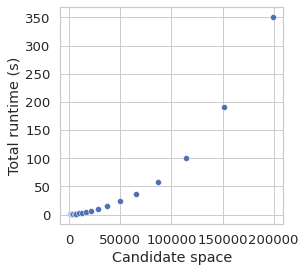

In [4]:
rcParams['figure.figsize'] = (4, 4)
sns.scatterplot(data=delob_df,
             x="Candidate space",
             y="Total time")
plt.xlabel('Candidate space')
plt.ylabel('Total runtime (s)')
plt.show()

Text(0, 0.5, 'BLAST runtime (s)')

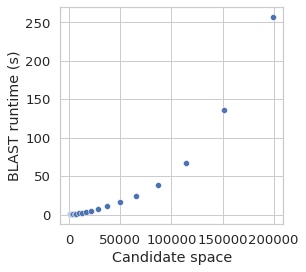

In [5]:
sns.scatterplot(data=delob_df,
             x="Candidate space",
             y="BLAST time")
plt.xlabel('Candidate space')
plt.ylabel('BLAST runtime (s)')

Text(0, 0.5, 'Network elimination runtime (s)')

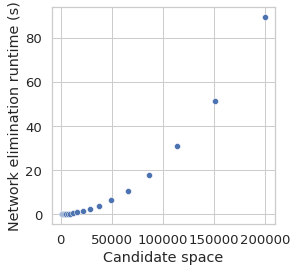

In [6]:
sns.scatterplot(data=delob_df,
             x="Candidate space",
             y="Network elimination time")
plt.xlabel('Candidate space')
plt.ylabel('Network elimination runtime (s)')

Text(0, 0.5, 'Preprocessing time (s)')

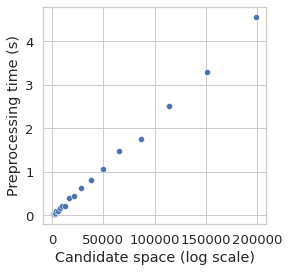

In [7]:
sns.scatterplot(data=delob_df,
             x="Candidate space",
             y="Preprocessing time")
plt.xlabel('Candidate space (log scale)')
plt.ylabel('Preprocessing time (s)')

# preparing source data file for F2

In [6]:
d = {
    "Design tool" : [],
    "Time (s)" : [],
    "Peak memory usage (GB)" : [],
    "Library size" : []
}

for row in delob_df.iterrows():
    d['Design tool'].append('DeLOB')
    d['Time (s)'].append(row[1]['Total time'])
    d['Library size'].append(row[1]['Library size'])
    d['Peak memory usage (GB)'].append(row[1]['Peak memory usage (GB)'])

d['Design tool'].append('seqwalk')
d['Time (s)'].append(seqwalk_df['Time (s)'][0])
d['Library size'].append(seqwalk_df['Library size'][0])
d['Peak memory usage (GB)'].append(seqwalk_df['Memory usage (GB)'][0])

In [9]:
pd.DataFrame(d).to_csv('source_data_f2.csv')